# Alternative Network Representations

## The Incidence Matrix

Instead of having values in a symmetric matrix represent possible edges, like with the Adjacency Matrix, we could have rows represent nodes and columns represent edges. This is called the *Incidence Matrix*, and it's useful to know about -- although it won't appear too much in this book. If there are $n$ nodes and $m$ edges, you make an $n \times m$ matrix. Then, to determine whether a node is a member of a given edge, you'd go to that node's row and the edge's column. If the entry is nonzero ($1$ if the network is unweighted), then the node is a member of that edge, and if there's a $0$, the node is not a member of that edge.

You can see the incidence matrix for our network below. Notice that with incidence plots, edges are (generally arbitrarily) assigned indices as well as nodes.

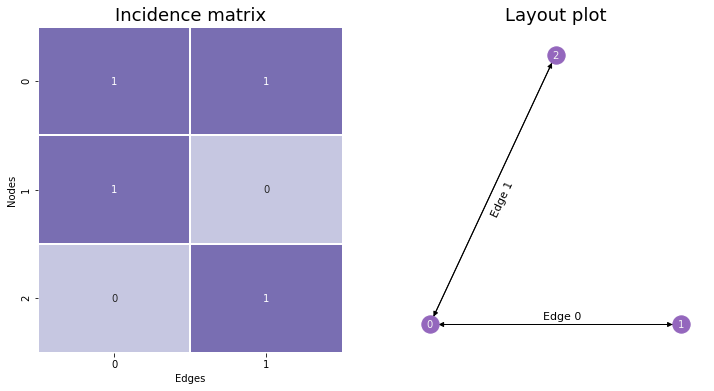

In [3]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=2)

I = incidence_matrix(nx.Graph(A)).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(I, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Incidence matrix", fontsize=18)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)

When networks are large, incidence matrices tend to be extremely sparse -- meaning, their values are mostly 0's. This is because each column must have exactly two nonzero values along its rows: one value for the first node its edge is connected to, and another for the second. Because of this, incidence matrices are usually represented in Python computationally as scipy's *sparse matrices* rather than as numpy arrays, since this data type is much better-suited for matrices which contain mostly zeroes.

You can also add orientation to incidence matrices, even in undirected networks, which we'll discuss next.

## The Oriented Incidence Matrix

The oriented incidence matrix is extremely similar to the normal incidence matrix, except that you assign a direction or orientation to each edge: you define one of its nodes as being the head node, and the other as being the tail. For undirected networks, you can assign directionality arbitrarily. Then, for the column in the incidence matrix corresponding to a given edge, the tail node has a value of $-1$, and the head node has a value of $0$. Nodes who aren't a member of a particular edge are still assigned values of $0$. We'll give the oriented incidence matrix the name $N$.

Text(0.9, -0.05, 'Head Node')

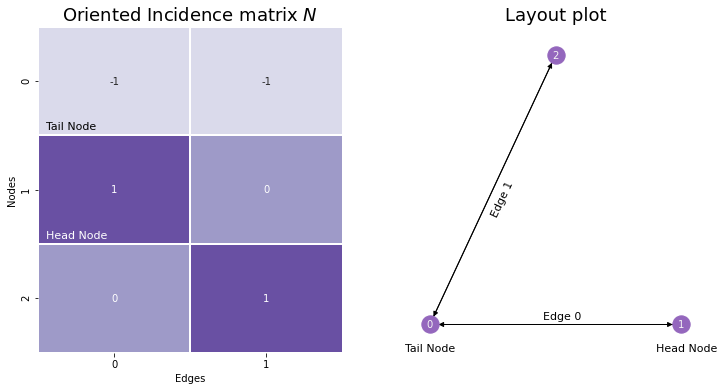

In [4]:
from networkx.linalg.graphmatrix import incidence_matrix
cmap = sns.color_palette("Purples", n_colors=3)

N = incidence_matrix(nx.Graph(A), oriented=True).toarray().astype(int)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

plot = sns.heatmap(N, annot=True, linewidths=.1, cmap=cmap,
                   cbar=False, xticklabels=True, yticklabels=True, ax=axs[0]);
plot.set_xlabel("Edges")
plot.set_ylabel("Nodes")
plot.set_title("Oriented Incidence matrix $N$", fontsize=18)
plot.annotate("Tail Node", (.05, .95), color='black', fontsize=11)
plot.annotate("Head Node", (.05, 1.95), color='white', fontsize=11)

ax2 = nx.draw_networkx(G, with_labels=True, node_color="tab:purple", pos=pos,
                font_size=10, font_color="whitesmoke", arrows=True, edge_color="black",
                width=1, ax=axs[1])

ax2 = plt.gca()
ax2.text(.24, 0.2, s="Edge 1", color='black', fontsize=11, rotation=65)
ax2.text(.45, 0.01, s="Edge 0", color='black', fontsize=11)
ax2.set_title("Layout plot", fontsize=18)
sns.despine(ax=ax2, left=True, bottom=True)
ax2.text(-.1, -.05, s="Tail Node", color='black', fontsize=11)
ax2.text(.9, -.05, s="Head Node", color='black', fontsize=11)

Although we won't use incidence matrices, oriented or otherwise, in this book too much, we introduced them because there's a deep connection between incidence matrices, adjacency matrices, and a matrix representation that we haven't introduced yet called the Laplacian. Before we can explore that connection, we'll discuss one more representation: the degree matrix.